In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import clear_marks as cm
from helper import draw_graph

# BFS

0 {'marked': 'False'}
1 {'marked': 'False'}
2 {'marked': 'False'}
3 {'marked': 'False'}
4 {'marked': 'False'}
5 {'marked': 'False'}
6 {'marked': 'False'}
7 {'marked': 'False'}
8 {'marked': 'False'}
9 {'marked': 'False'}


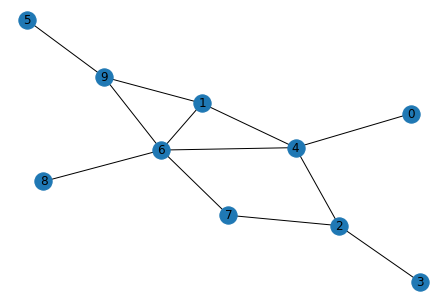

In [2]:
G = nx.erdos_renyi_graph(10, 0.3)

for node in G:
    G.nodes[node]['marked'] = 'False'
    print(node, G.nodes[node])
    
nx.draw(G, with_labels=True)

In [3]:
def BFS(graph, node):
    queue = []
    queue.append(node)
    graph.nodes[node]['marked'] = True
    
    while queue:
        popped = queue.pop(0)
        
        for neighbor in graph.adj[popped]:
            if not graph.nodes[neighbor]['marked']:
                print(f'marking edge: ({popped}, {neighbor})')
                graph.edges[popped, neighbor]['marked'] = True
                graph.nodes[neighbor]['marked'] = True
                queue.append(neighbor)
        
    
cm(G)
BFS(G, 0)   
        
    

marking edge: (0, 4)
marking edge: (4, 1)
marking edge: (4, 2)
marking edge: (4, 6)
marking edge: (1, 9)
marking edge: (2, 3)
marking edge: (2, 7)
marking edge: (6, 8)
marking edge: (9, 5)


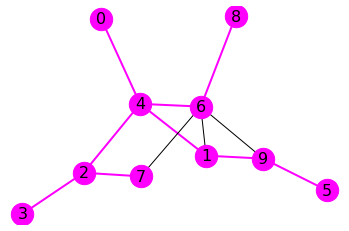

In [4]:
draw_graph(G)
